## Step 1: Define the Objectives
##### Clearly outline the goals of your analysis. Possible objectives could include:

* Analyzing sales trends over time.
* Identifying high-performing products, categories, and sub-categories.
* Analyzing sales performance by region and segment.
* Investigating shipping modes and their impacts on delivery times.

## Step 2: Gather and Import Data
##### Ensure you have the Superstore Sales dataset. Here’s an example of what your data might look like:

* Use pandas to load and explore your data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\vamsh\Downloads\archive\train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Step 3: Clean and Preprocess Data
#### Handle missing values, correct data types, and create any necessary columns.

In [3]:
#check for missing values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
#drop missing values
data=df.dropna()

In [5]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [6]:
# Convert 'Order Date' and Ship Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'],format = '%d/%m/%Y')
data['ship Date'] = pd.to_datetime(data['Ship Date'],format = '%d/%m/%Y')

C:\Users\vamsh\AppData\Local\Temp\ipykernel_16992\3571513130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order Date'] = pd.to_datetime(data['Order Date'],format = '%d/%m/%Y')
C:\Users\vamsh\AppData\Local\Temp\ipykernel_16992\3571513130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ship Date'] = pd.to_datetime(data['Ship Date'],format = '%d/%m/%Y')


In [7]:
# Convert 'Order Date' and 'Ship Date' to datetime format with dayfirst
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

C:\Users\vamsh\AppData\Local\Temp\ipykernel_16992\556870424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
C:\Users\vamsh\AppData\Local\Temp\ipykernel_16992\556870424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)


In [8]:
# Check data types
print(data.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
ship Date        datetime64[ns]
dtype: object


## Step 4: Exploratory Data Analysis (EDA)
#### Perform initial analysis to understand the data.

In [9]:
# Summary statistics
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,ship Date
count,9789.000000,9789,9789,9789.000000,9789.000000,9789
mean,4896.705588,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,55273.322403,230.116193,2017-05-05 01:56:03.898253056
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,2015-01-07 00:00:00
25%,2449.000000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.248000,2016-05-27 00:00:00
50%,4896.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.384000,2017-06-29 00:00:00
75%,7344.000000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.392000,2018-05-19 00:00:00
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,2019-01-05 00:00:00
std,2827.486899,NaN,NaN,32041.223413,625.302079,NaN


In [10]:
#group by region and sum.sales 

sales_by_region = data.groupby('Region')['Sales'].sum()
sales_by_region

Region
Central    492646.9132
East       660589.3560
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

In [11]:
#groupby by categories and sum of sale

sales_by_category = data.groupby('Category')['Sales'].sum()
sales_by_category

Category
Furniture          723538.4757
Office Supplies    703212.8240
Technology         825856.1130
Name: Sales, dtype: float64

In [12]:
#group by Sub-Category and sum sales
sales_by_subCategory = data.groupby('Sub-Category')['Sales'].sum()
sales_by_subCategory

Sub-Category
Accessories    163881.6900
Appliances     104075.4630
Art             26697.3700
Binders        200028.7850
Bookcases      109408.2987
Chairs         322107.5310
Copiers        146248.0940
Envelopes       16126.0060
Fasteners        3001.9600
Furnishings     89212.0180
Labels          12347.7260
Machines       189238.6310
Paper           76736.1040
Phones         326487.6980
Storage        217779.1020
Supplies        46420.3080
Tables         202810.6280
Name: Sales, dtype: float64

In [13]:
#group by Segment and sum sales
sales_by_segment = data.groupby('Segment')['Sales'].sum()
sales_by_segment

Segment
Consumer       1.146708e+06
Corporate      6.822118e+05
Home Office    4.236874e+05
Name: Sales, dtype: float64

## Step 5: Data Visualization
#### Use libraries like matplotlib and seaborn to create visualizations.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

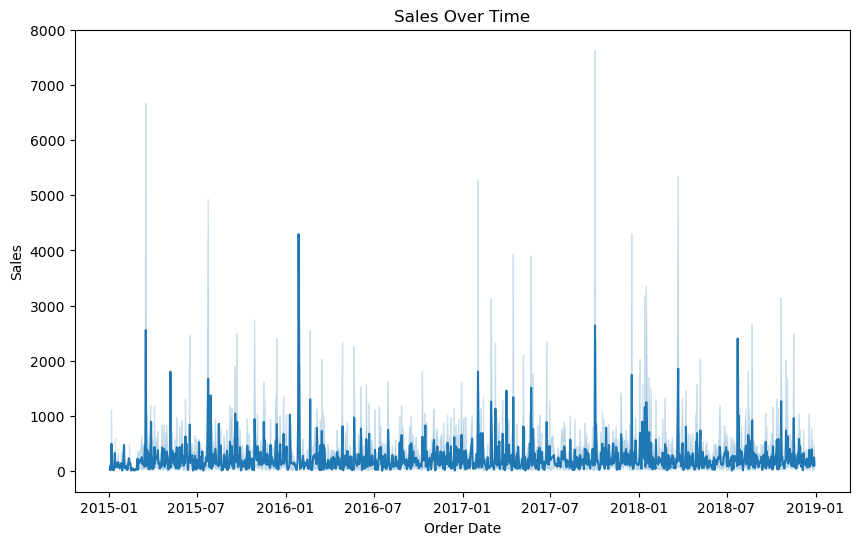

In [15]:
#sales over time
plt.figure(figsize = (10, 6 ))
sns.lineplot(data = data, x = 'Order Date',y = 'Sales' )
plt.xticks(rotation = 0)
plt.title ('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

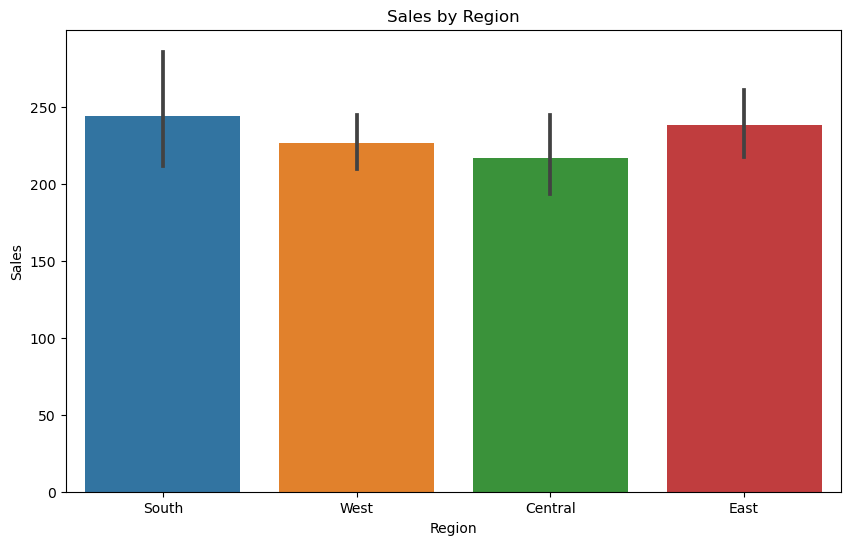

In [16]:
#sales by Region
plt.figure(figsize = (10,6))
sns.barplot(data = data, x = 'Region', y = 'Sales')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

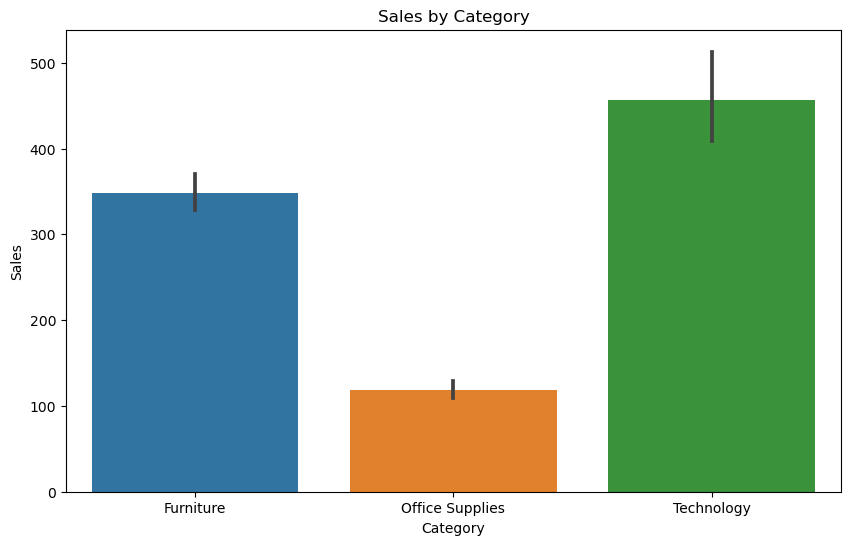

In [17]:
#sales by category
plt.figure(figsize = (10,6))
sns.barplot(data = data, x = 'Category', y = 'Sales')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

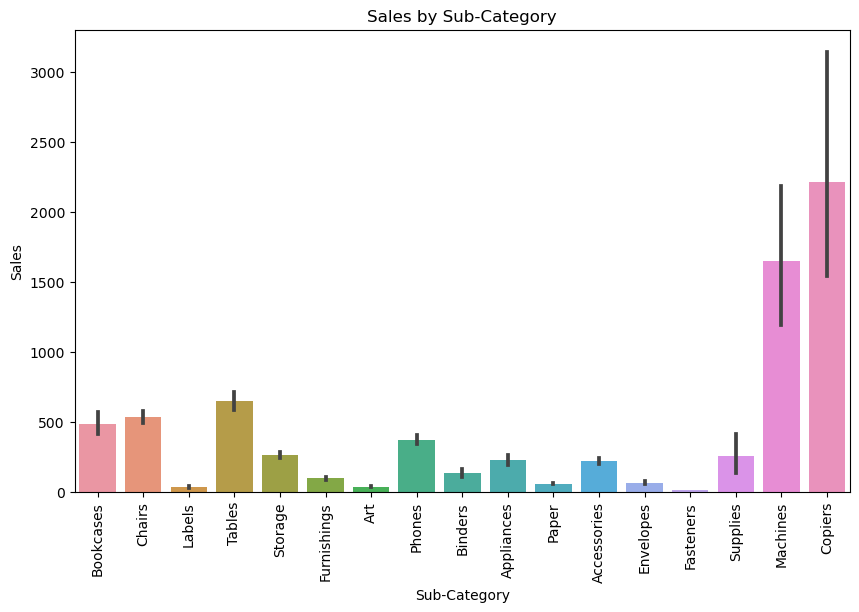

In [18]:
#sales by sub-category
plt.figure(figsize = (10,6))
sns.barplot(data = data, x = 'Sub-Category', y = 'Sales')
plt.xticks(rotation = 90)
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

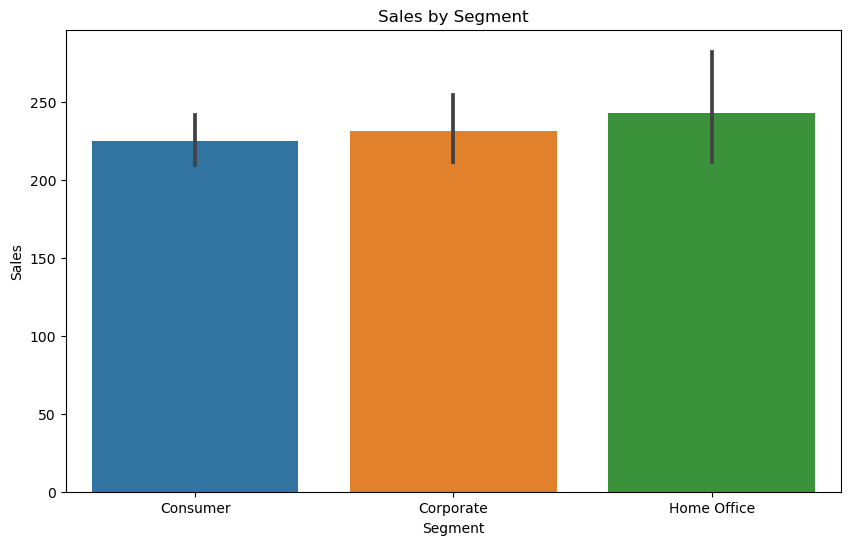

In [19]:
#sales by segment
plt.figure(figsize = (10, 6))
sns.barplot(data = data, x = 'Segment', y = 'Sales')
plt.xticks(rotation = 0)
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.title('Sales by Segment')
plt.show()

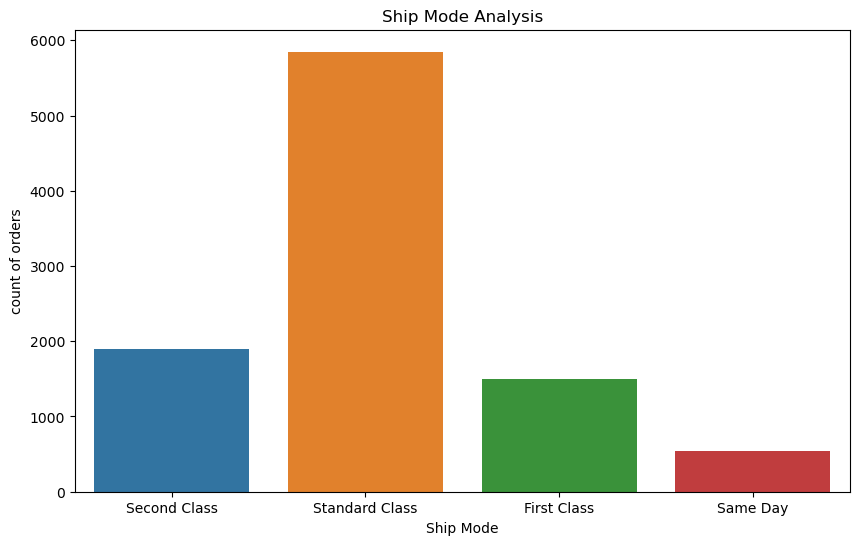

In [20]:
#shipmode analysis
plt.figure(figsize = (10,6))
sns.countplot(data = data,  x = 'Ship Mode')
plt.title('Ship Mode Analysis')
plt.xlabel('Ship Mode')
plt.ylabel('count of orders')
plt.show()

## Step 6: Advanced Analysis
##### Dive deeper into specific analyses, such as trend analysis, seasonality, and correlations.

In [21]:
#monthly sales trend
data['Month'] = data["Order Date"].dt.to_period('M')# Extract the month from 'Order Date'
monthly_sales = data.groupby('Month')['Sales'].sum()# Group by 'Month' and sum the sales

C:\Users\vamsh\AppData\Local\Temp\ipykernel_16992\2196461872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data["Order Date"].dt.to_period('M')


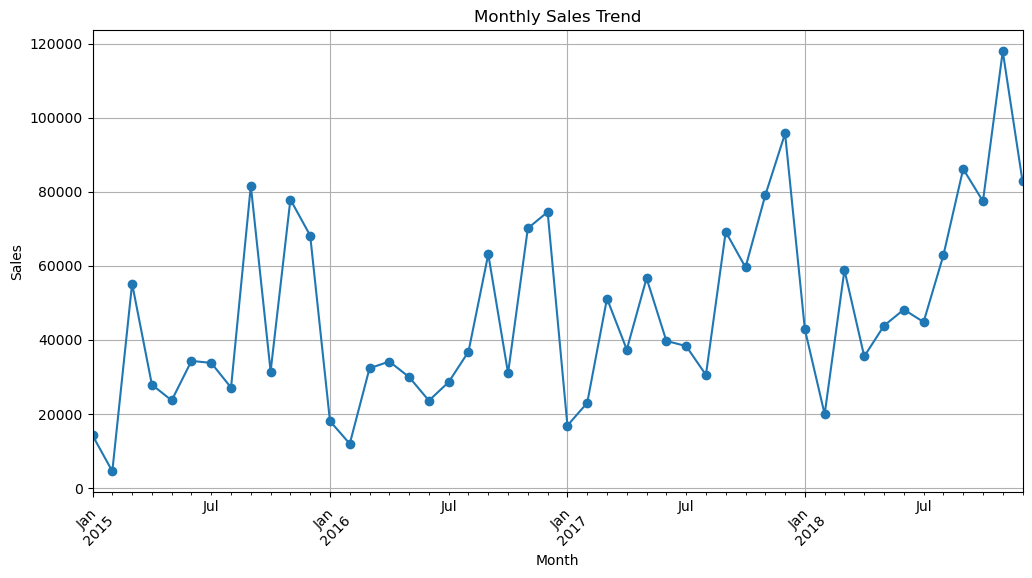

In [22]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)
plt.show()

C:\Users\vamsh\AppData\Local\Temp\ipykernel_16992\830906592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shipping Time'] = (data['Ship Date']-data['Order Date']).dt.days


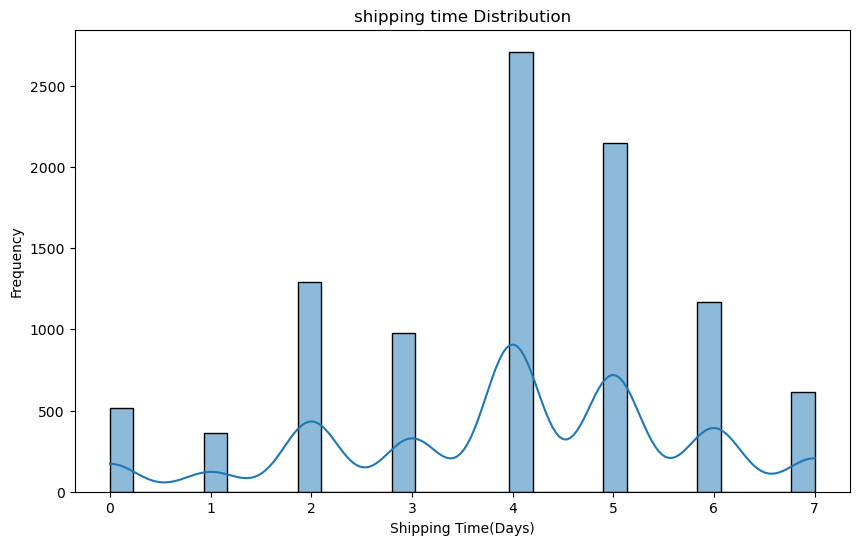

In [25]:
#shipping time analysis
data['Shipping Time'] = (data['Ship Date']-data['Order Date']).dt.days
plt.figure(figsize = (10,6))
sns.histplot(data = data,x = 'Shipping Time',bins = 30, kde = True)
plt.title('shipping time Distribution')
plt.xlabel('Shipping Time(Days)')
plt.ylabel('Frequency')
plt.show()

## Summary
* Overall Trends: Identified an increasing trend in sales over the past few years.
* Top Performing Regions: The South region had the highest total sales.
* High-Performing Categories: Technology and furniture had the highest total sales.
* Shipping Modes: Standard Class was the most used shipping mode.
* Shipping Time: Average shipping time was around 2-4 days, with a few outliers.